In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import seaborn as sns

# Data Collection

In [210]:
# Read data and preprocess
all_data = pd.read_csv('owid-covid-data.csv')
all_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57796,ZWE,Africa,Zimbabwe,2020-12-29,13325.0,177.0,111.571,359.0,5.0,4.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57797,ZWE,Africa,Zimbabwe,2020-12-30,13625.0,300.0,138.429,360.0,1.0,4.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57798,ZWE,Africa,Zimbabwe,2020-12-31,13867.0,242.0,154.429,363.0,3.0,3.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57799,ZWE,Africa,Zimbabwe,2021-01-01,14084.0,217.0,172.000,369.0,6.0,4.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


# Feature Engineering

In [211]:
all_data.drop(all_data[all_data['location']!='India'].index, inplace=True) # keep only rows for India
all_data.drop(all_data[all_data['total_cases'] == 0].index, inplace=True) # remove rows with cases=0
le = preprocessing.LabelEncoder()  
all_data['date'] = pd.to_datetime(all_data['date']) #Converting the object data-type into datetime data-type using pandasLibary
all_data['Day_num'] = le.fit_transform(all_data['date']) # convert datetime to Integer using labelEncoder and created new 'day_Num'column 
all_data.reset_index(inplace=True, drop=True) #dropping the s.no to set it to default

# Feature Selection

In [212]:
# Feature selection using Pearson Correlation
plt.figure(figsize=(12,10))
cor=all_data.corr()  # finding correlation between features
cor

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Day_num
total_cases,1.000000e+00,5.315919e-01,5.641062e-01,9.965575e-01,3.377034e-01,4.706593e-01,1.000000e+00,5.315927e-01,5.641061e-01,9.965574e-01,...,8.325839e-16,3.086570e-15,3.086570e-15,3.793443e-15,-1.394922e-15,-2.884774e-15,-1.394922e-15,1.394922e-15,-3.850414e-15,0.924432
new_cases,5.315919e-01,1.000000e+00,9.904820e-01,5.281373e-01,9.305386e-01,9.705945e-01,5.315919e-01,1.000000e+00,9.904822e-01,5.281375e-01,...,1.489767e-15,-1.869871e-15,-1.869871e-15,2.890965e-15,-2.499088e-15,-2.457950e-15,-2.499088e-15,2.499088e-15,6.863384e-16,0.665333
new_cases_smoothed,5.641062e-01,9.904820e-01,1.000000e+00,5.692463e-01,9.164474e-01,9.718793e-01,5.641062e-01,9.904820e-01,1.000000e+00,5.692465e-01,...,-2.050651e-16,6.365121e-16,6.365121e-16,7.584696e-16,-4.580557e-17,3.390040e-16,-6.724818e-16,6.724818e-16,3.438374e-17,0.682352
total_deaths,9.965575e-01,5.281373e-01,5.692463e-01,1.000000e+00,4.055340e-01,4.657248e-01,9.965575e-01,5.281381e-01,5.692461e-01,1.000000e+00,...,2.942669e-16,-5.018207e-15,-4.365711e-15,-2.531727e-15,-2.442255e-15,2.111319e-15,4.365711e-15,-4.365711e-15,-3.080013e-15,0.969419
new_deaths,3.377034e-01,9.305386e-01,9.164474e-01,4.055340e-01,1.000000e+00,9.557238e-01,3.377034e-01,9.305384e-01,9.164475e-01,4.055343e-01,...,-5.366530e-16,1.499213e-15,-2.080295e-15,-1.087180e-15,-2.058283e-15,1.810184e-15,2.080295e-15,-2.080295e-15,-1.855924e-15,0.507752
new_deaths_smoothed,4.706593e-01,9.705945e-01,9.718793e-01,4.657248e-01,9.557238e-01,1.000000e+00,4.706593e-01,9.705944e-01,9.718793e-01,4.657252e-01,...,2.282155e-16,5.362734e-16,5.362734e-16,7.652614e-16,-5.532439e-16,1.168510e-15,-2.867371e-16,2.867371e-16,8.765783e-16,0.653230
total_cases_per_million,1.000000e+00,5.315919e-01,5.641062e-01,9.965575e-01,3.377034e-01,4.706593e-01,1.000000e+00,5.315927e-01,5.641061e-01,9.965574e-01,...,3.811228e-16,-1.544892e-16,-1.544892e-16,-2.802525e-17,-2.364631e-17,3.371115e-16,-2.364631e-17,2.364631e-17,7.750734e-17,0.924432
new_cases_per_million,5.315927e-01,1.000000e+00,9.904820e-01,5.281381e-01,9.305384e-01,9.705944e-01,5.315927e-01,1.000000e+00,9.904822e-01,5.281383e-01,...,-6.030033e-17,-1.467616e-16,-1.467616e-16,-5.571385e-17,3.876058e-16,-2.444181e-16,3.876058e-16,-3.876058e-16,1.080092e-17,0.665334
new_cases_smoothed_per_million,5.641061e-01,9.904822e-01,1.000000e+00,5.692461e-01,9.164475e-01,9.718793e-01,5.641061e-01,9.904822e-01,1.000000e+00,5.692463e-01,...,-4.682805e-16,2.734345e-16,2.734345e-16,-4.758799e-17,2.928964e-16,-1.585674e-16,5.059340e-16,-5.059340e-16,5.792202e-18,0.682352
total_deaths_per_million,9.965574e-01,5.281375e-01,5.692465e-01,1.000000e+00,4.055343e-01,4.657252e-01,9.965574e-01,5.281383e-01,5.692463e-01,1.000000e+00,...,5.998461e-16,1.887873e-16,-2.271247e-16,1.784918e-16,-2.205350e-16,-3.986226e-16,2.271247e-16,-2.271247e-16,-2.228009e-16,0.969419


<Figure size 864x720 with 0 Axes>

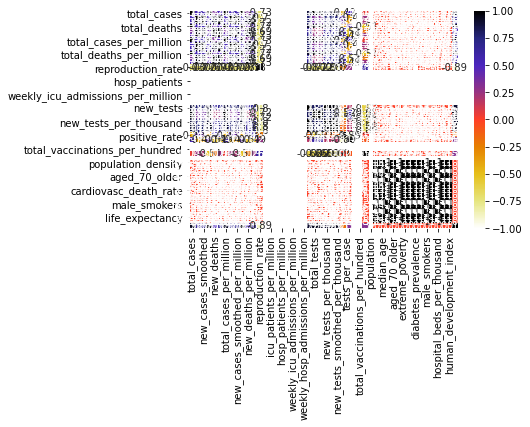

In [213]:
#Data Visulization using heatmap
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r) #plotting the correlation matrix
plt.show()

In [214]:
# correlation with output variable
cor_target=abs(cor["total_cases"])
cor_target

total_cases                           1.000000e+00
new_cases                             5.315919e-01
new_cases_smoothed                    5.641062e-01
total_deaths                          9.965575e-01
new_deaths                            3.377034e-01
new_deaths_smoothed                   4.706593e-01
total_cases_per_million               1.000000e+00
new_cases_per_million                 5.315927e-01
new_cases_smoothed_per_million        5.641061e-01
total_deaths_per_million              9.965574e-01
new_deaths_per_million                3.376502e-01
new_deaths_smoothed_per_million       4.706499e-01
reproduction_rate                     7.309048e-01
icu_patients                                   NaN
icu_patients_per_million                       NaN
hosp_patients                                  NaN
hosp_patients_per_million                      NaN
weekly_icu_admissions                          NaN
weekly_icu_admissions_per_million              NaN
weekly_hosp_admissions         

In [215]:
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)

total_cases                        1.000000
new_cases                          0.531592
new_cases_smoothed                 0.564106
total_deaths                       0.996557
total_cases_per_million            1.000000
new_cases_per_million              0.531593
new_cases_smoothed_per_million     0.564106
total_deaths_per_million           0.996557
reproduction_rate                  0.730905
new_tests                          0.879097
total_tests                        0.988232
total_tests_per_thousand           0.988232
new_tests_per_thousand             0.879094
new_tests_smoothed                 0.911482
new_tests_smoothed_per_thousand    0.911495
Day_num                            0.924432
Name: total_cases, dtype: float64


In [216]:
# finding correlation between 2 most likely features
print(all_data[["total_deaths","total_tests"]].corr())

              total_deaths  total_tests
total_deaths      1.000000     0.977496
total_tests       0.977496     1.000000


# Data Visualization

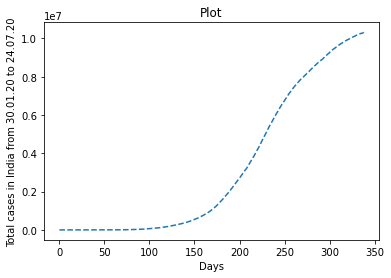

In [218]:
# plot initial cases vs date
y = all_data['total_cases']
x = range(0, len(y))
plt.plot(x,y,'--')
plt.title('Plot')
plt.xlabel('Days')
plt.ylabel('Total cases in India from 30.01.20 to 24.07.20')
plt.show()

# Model Creation

In [220]:
# define features and labels
features=['total_cases', 'Day_num', 'total_deaths']
req_data=all_data[features].astype('float64').apply(lambda x: np.log1p(x)) # apply natural logarithm to all values
req_data.replace([np.inf, -np.inf], 0, inplace=True) # Replace infinities with 0
req_data.dropna(how='any', axis=0, inplace=True)     # drop null values
train_data=req_data.drop(['total_cases'], axis=1)  # drop the target variable so training set contains only features
labels=req_data['total_cases']                     # define target variable
#print(labels.shape)  #120 rows

In [221]:
# split data
x_train , x_test , y_train , y_test = train_test_split(train_data , labels , test_size = 0.10)

In [222]:
# Create linear regression model
reg=LinearRegression()

In [223]:
# Train the model using the training sets
reg.fit(x_train,y_train)

LinearRegression()

In [225]:
# Predict on test set
y_pred = reg.predict(x_test)
y_pred = np.expm1(y_pred) # applying exponential to reverse log transformation
y_pred

array([7.67376854e+06, 9.59260462e+05, 1.02876877e+07, 1.23260189e+05,
       8.68558408e+06, 2.95604896e+06, 1.59006275e+02, 1.28820867e+05,
       9.12244033e+06, 5.10719619e+06, 3.20009664e+06, 1.82377280e+04,
       5.97899072e+06, 2.13044921e+06, 7.02085714e+05, 8.53594375e+06,
       4.96882585e+02, 1.13676317e+06, 8.17633203e+06, 7.60310667e+06,
       3.31971091e+06, 9.20880370e+04, 7.12016788e+06, 1.18022254e+07,
       7.20924354e+05, 5.40091155e+04, 1.01247567e+07, 1.14767385e+02,
       6.66855180e+06, 8.82969125e+06])

In [226]:
# Predict Covid-19 cases for 15th Aug, 2020
FifteenthAugPred = reg.predict(np.log1p(np.array([198,46359])).reshape(1,-1))
print("FifteenthAugPred:", np.expm1(FifteenthAugPred).astype(int))  # applying exponential to reverse log transformation

FifteenthAugPred: [2207431]


In [227]:
# find metrics
y_test = np.expm1(y_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', np.sqrt(metrics.r2_score(y_test, y_pred)))

MAE: 302366.56981848547
MSE: 227655648695.33954
RMSE: 477132.73697718495
R2 score: 0.9922604075891762


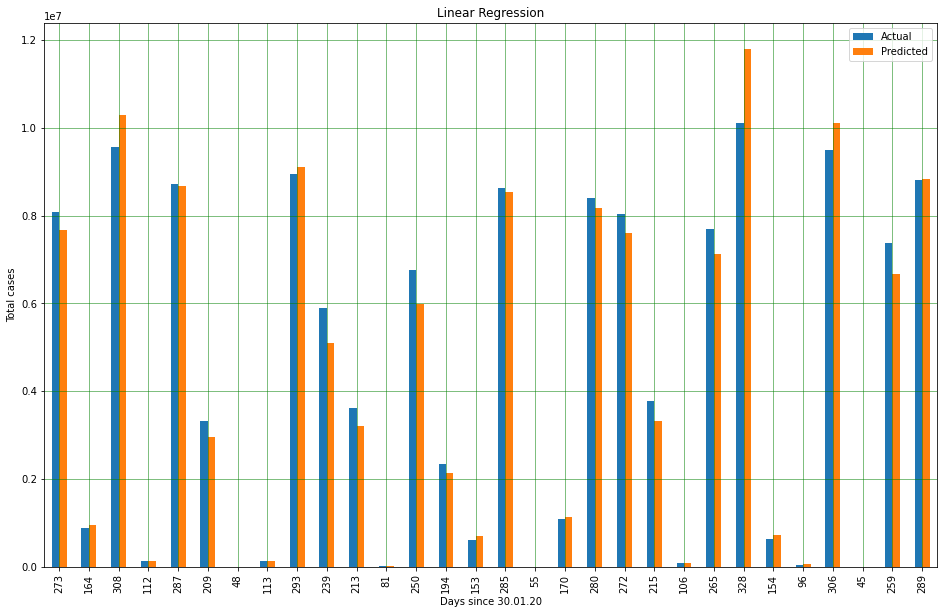

In [228]:
# plot predicted data
data = {'Actual': y_test, 'Predicted': y_pred}
comparison_df = pd.DataFrame(data)
comparison_df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Linear Regression")
plt.xlabel("Days since 30.01.20")
plt.ylabel("Total cases")
plt.show()

In [229]:
# Regularization using Elastic Net It is a combination of regularization L1 and L2.
model_enet=ElasticNet(normalize=True)
param_list={"alpha":[1, 0.5, 0.1, 0.001, 0.001, 1e-4],"l1_ratio": [0, 0.25, 0.5, 0.75, 1]}
gridCV=GridSearchCV(estimator=model_enet, param_grid=param_list, n_jobs=-1, refit=True)
grid_result=gridCV.fit(x_train, y_train)
predicted=gridCV.predict(x_test)
predicted=np.expm1(predicted)
print("Best: %f usinf %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.998573 usinf {'alpha': 0.0001, 'l1_ratio': 1}


In [230]:
# Predict Covid-19 cases for 15th Aug, 2020
FifteenthAugPred = gridCV.predict(np.log1p(np.array([198,46359])).reshape(1,-1))
print("FifteenthAugPred using Elastic net:", np.expm1(FifteenthAugPred).astype(int))  # applying exponential to reverse log transformation

FifteenthAugPred using Elastic net: [2205286]


In [232]:
# find metrics
print('MAE:', metrics.mean_absolute_error(y_test, predicted))
print('MSE:', metrics.mean_squared_error(y_test, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R2 score:', np.sqrt(metrics.r2_score(y_test, predicted)))

MAE: 303734.7330562511
MSE: 228621612817.05807
RMSE: 478143.92479363165
R2 score: 0.9922274391553749


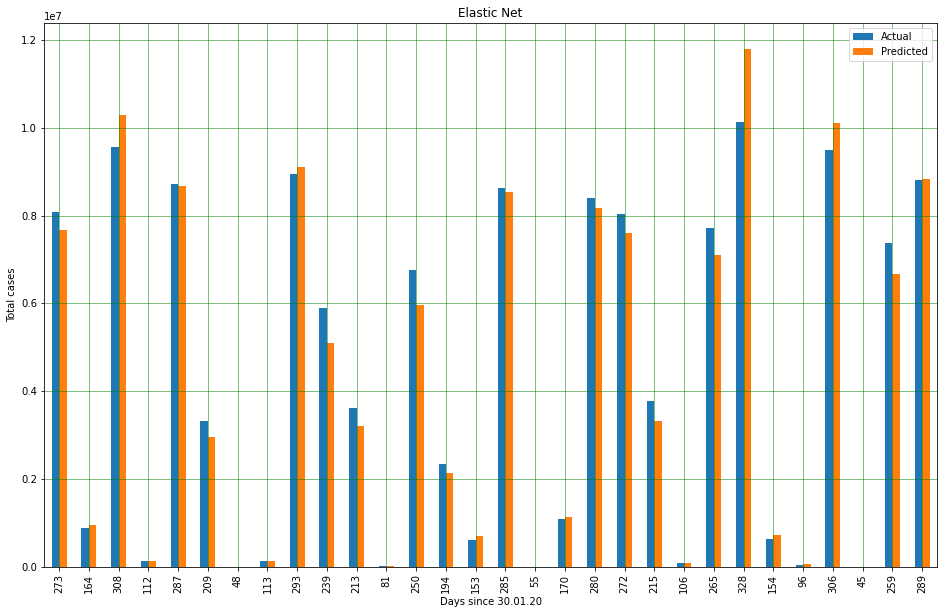

In [233]:
# plot predicted data
data = {'Actual': y_test, 'Predicted': predicted}
comparison_df = pd.DataFrame(data)
#print(comparison_df.head)
comparison_df.plot(kind='bar',figsize=(16,10))
plt.title("Elastic Net")
plt.xlabel("Days since 30.01.20")
plt.ylabel("Total cases")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()